<a href="https://colab.research.google.com/github/EA17-ai/DLProjects/blob/main/CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Required Modules**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

**Load CiFar-10 Dataset**

In [ ]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [ ]:
len(X_train)

50000

In [ ]:
len(X_test)

10000

**Add classes**

In [ ]:
y_values=["aeroplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Text(0.5, 0, 'frog')

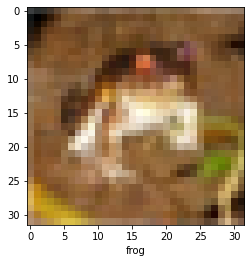

In [ ]:
plt.imshow(X_train[0])
plt.xlabel(y_values[int(y_train[0])])

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

**Scale the Values to be in range of 0 to 1:**

In [ ]:
X_train_scale=X_train/255
X_test_scale=X_test/255

In [ ]:
nO_of_train_images,l,w,c=X_train.shape

 **Reshape the Images: image shape(32,32,3) is reshaped to(32*32*3,)** 

In [ ]:
X_train_reshaped=X_train_scale.reshape(len(X_train_scale),l*w*c)
X_test_reshaped=X_test_scale.reshape(len(X_test_scale),l*w*c)

In [ ]:
X_train_reshaped.shape

(50000, 3072)

In [ ]:
X_test_reshaped.shape

(10000, 3072)

In [ ]:
y_train_categorical=keras.utils.to_categorical(
    y_train,num_classes=10,dtype="float32"
)

In [ ]:
y_test_categorical=keras.utils.to_categorical(
    y_test,num_classes=10,dtype="float32"
)

In [ ]:
y_test_categorical[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
model=keras.Sequential([
      tf.keras.layers.Dense(3000,input_shape=(3072,),activation="relu"),                  
      tf.keras.layers.Dense(1000,activation="relu"),                  
      tf.keras.layers.Dense(10,activation="sigmoid")
])

In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
model.fit(X_train_reshaped,y_train_categorical,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 123s 79ms/step - loss: 1.8899 - accuracy: 0.3255
Epoch 2/10
1563/1563 [==============================] - 121s 77ms/step - loss: 1.6653 - accuracy: 0.4036
Epoch 3/10
1563/1563 [==============================] - 120s 77ms/step - loss: 1.5848 - accuracy: 0.4318
Epoch 4/10
1563/1563 [==============================] - 120s 77ms/step - loss: 1.5327 - accuracy: 0.4494
Epoch 5/10
1563/1563 [==============================] - 120s 77ms/step - loss: 1.4935 - accuracy: 0.4657
Epoch 6/10
1563/1563 [==============================] - 119s 76ms/step - loss: 1.4560 - accuracy: 0.4803
Epoch 7/10
1563/1563 [==============================] - 120s 77ms/step - loss: 1.4278 - accuracy: 0.4885
Epoch 8/10
1563/1563 [==============================] - 120s 77ms/step - loss: 1.4067 - accuracy: 0.4988
Epoch 9/10
1563/1563 [==============================] - 120s 77ms/step - loss: 1.3824 - accuracy: 0.5081
Epoch 10/10
1563/1563 [==============================] 

In [ ]:
model.evaluate(X_test_reshaped,y_test_categorical)

In [ ]:
ypred=model.predict(X_test_reshaped)

In [ ]:

y_pred_val=numpy.argmax(ypred)

In [ ]:
y_pred_val.shape